In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## Clean Files
Remove all columns that contain crude values or 95 confidence interval values

In [6]:
PATHS_TO_FILES = [
    "./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107",
    "./data/PLACES__County_Data__GIS_Friendly_Format___2022_release"
    ]

filtered = []

for PATH_TO_FILE in PATHS_TO_FILES:
    df = pd.read_csv(PATH_TO_FILE + ".csv")

    filtered_col_names = []

    for col_name in df.columns:
        if not "crude" in col_name.lower() and not "95ci" in col_name.lower():
            filtered_col_names.append(col_name)

    filtered_df = df[filtered_col_names]
    filtered.append(filtered_df)

    filtered_df.to_csv(PATH_TO_FILE + "_filtered.csv")

In [7]:
weighted_mean = filtered_df.groupby("StateDesc").apply(lambda x: (x["OBESITY_AdjPrev"] * x['TotalPopulation']).sum() / x['TotalPopulation'].sum()).reset_index(name='Weighted_Value')
weighted_mean

,StateDesc,Weighted_Value
0,Alabama,39.122985
1,Alaska,31.157128
2,Arizona,31.313909
3,Arkansas,37.195364
4,California,28.992029
5,Colorado,24.957341
6,Connecticut,29.553785
7,Delaware,35.537469
8,District of Columbia,24.200000
9,Florida,31.293397


In [18]:
# no values for Florida
df = filtered[0]

df[df["StateAbbr"] == "FL"]["OBESITY_AdjPrev"]

351    NaN
356    NaN
376    NaN
377    NaN
381    NaN
        ..
2876   NaN
2883   NaN
2968   NaN
3059   NaN
3069   NaN
Name: OBESITY_AdjPrev, Length: 67, dtype: float64

/var/folders/2d/y_xyxzmd30xdgjk5kf8wqrxw0000gn/T/ipykernel_1795/4043190733.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=weighted_mean_wo_fl_dc['Weighted_Value'], shade=True)


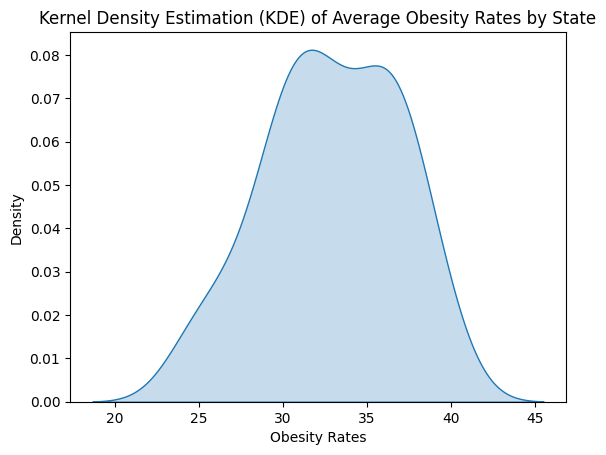

In [9]:
weighted_mean_wo_fl = weighted_mean[weighted_mean["StateDesc"] != "Florida"]
weighted_mean_wo_fl_dc = weighted_mean_wo_fl[weighted_mean_wo_fl["StateDesc"] != "District of Columbia"]

# Plot KDE using Seaborn
sns.kdeplot(data=weighted_mean_wo_fl_dc['Weighted_Value'], shade=True)
plt.title('Kernel Density Estimation (KDE) of Average Obesity Rates by State')
plt.xlabel('Obesity Rates')
plt.ylabel('Density')
plt.show()

In [10]:
weighted_mean_wo_fl_dc

,StateDesc,Weighted_Value
0,Alabama,39.122985
1,Alaska,31.157128
2,Arizona,31.313909
3,Arkansas,37.195364
4,California,28.992029
5,Colorado,24.957341
6,Connecticut,29.553785
7,Delaware,35.537469
10,Georgia,34.989652
11,Hawaii,24.207074


In [11]:
sorted_data = weighted_mean_wo_fl_dc.sort_values(by='Weighted_Value', ascending=True)
sorted_data

,StateDesc,Weighted_Value
11,Hawaii,24.207074
5,Colorado,24.957341
21,Massachusetts,25.156181
32,New York,27.004798
45,Vermont,27.043371
30,New Jersey,27.065324
4,California,28.992029
37,Oregon,29.043174
47,Washington,29.221824
26,Montana,29.540355


In [12]:
weighted_mean_wo_fl_dc.describe()

,Weighted_Value
count,49.000000
mean,32.897189
std,4.007701
min,24.207074
25%,30.090838
50%,32.853263
75%,36.427327
max,39.966567


In [13]:
filtered_df_wo_fl = filtered_df[filtered_df["StateDesc"] != "Florida"]
filtered_df_wo_fl_dc = filtered_df_wo_fl[filtered_df_wo_fl["StateDesc"] != "District of Columbia"]
weighted_mean = (filtered_df_wo_fl_dc['OBESITY_AdjPrev'] * filtered_df_wo_fl_dc['TotalPopulation']).sum() / filtered_df_wo_fl_dc['TotalPopulation'].sum()
weighted_mean

32.65192555370875